In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import nsfg

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

## Exercise 2.4
Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [20]:
# import and select the data we need

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [21]:
# create a function to calculate Cohen's D

def CohensD (group1,group2):
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    size1, size2 = len(group1), len(group2)
    pooled_std = math.sqrt((size1 * var1 + size2 * var2) / (size1 + size2))
    d = (mean1 - mean2) / pooled_std
    print("first mean:",mean1)
    print("second mean:",mean2)
    print("cohen's d:",d)

In [22]:
# execute function to calculate Cohen's D for our groups of interest

CohensD(firsts['totalwgt_lb'],others['totalwgt_lb'])

first mean: 7.201094430437772
second mean: 7.325855614973262
cohen's d: -0.088672927072602


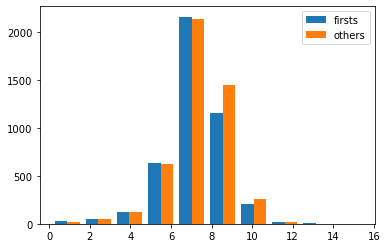

In [23]:
# supplementary visual comparison

plt.hist([firsts['totalwgt_lb'],others['totalwgt_lb']],label=['firsts','others'])
plt.legend(loc='upper right')

The difference in birhtweight between first-born and other births is more significant than when we looked at birth timing: Cohen's D of  -.089 (compared to .029). [This is considered a "large" effect size.](https://digitalcommons.wayne.edu/jmasm/vol8/iss2/26/)

## Exercise 3.1
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `NUMKDHH` to construct the actual distribution for the number of children under 18 in the household.


Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [24]:
# import dataset

resp = nsfg.ReadFemResp()

Actual mean: 1.024205155043831
Actual distribution: 
 0    3563
1    1636
2    1500
3     666
4     196
5      82
Name: numkdhh, dtype: int64
Actual PMF: 
 0    0.466178
1    0.214052
2    0.196258
3    0.087139
4    0.025644
5    0.010729
Name: numkdhh, dtype: float64


(array([0.4661782 , 0.21405207, 0.19625801, 0.08713856, 0.03637315]),
 array([0., 1., 2., 3., 4., 5.]),
 <a list of 5 Patch objects>)

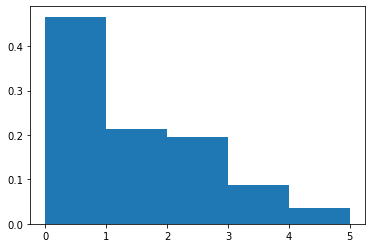

In [54]:
# calculate and plot actual distribution

actual_mean = resp['numkdhh'].mean()
actual_dist = resp['numkdhh'].value_counts()
actual_pmf = resp['numkdhh'].value_counts(normalize=True)

print("Actual mean:", actual_mean)
print("Actual distribution: \n", actual_dist)
print("Actual PMF: \n", actual_pmf)
plt.hist(resp['numkdhh'], bins=5, density=True)

Biased mean: 2.403679100664282
Biased PMF: 
 0    0.000000
1    0.208993
2    0.383240
3    0.255238
4    0.100153
5    0.052376
dtype: float64


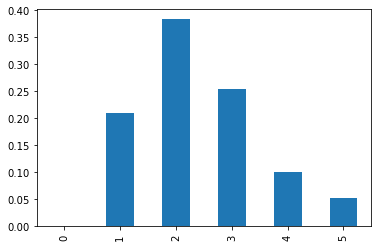

In [78]:
# calculate the biased PMF by multplying the actual frequency * the number of children in the household
# then normalize by dividing by the total sum

biased_pmf = actual_dist.multiply(actual_dist.index) / actual_dist.multiply(actual_dist.index).sum()
biased_mean = biased_pmf.multiply(biased_pmf.index).sum()

print("Biased mean:", biased_mean)
print("Biased PMF: \n", biased_pmf)
biased_pmf.plot(kind="bar")

In [79]:
# NOTE Goal is to return to this and figure out how to create a function that will generate the underlying dataset
# i.e. multiply each value in the original data series by its index

## Exercise 4.2
The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

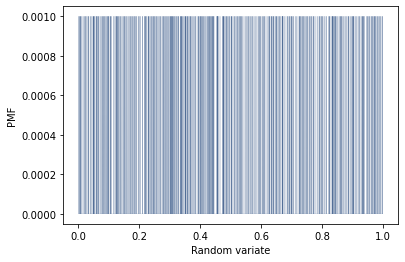

In [120]:
# generate random numbers
d = pd.Series(np.random.random(1000))

# plot their PMF
pmf = thinkstats2.Pmf(d)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

# NOTE would like to figure out how to do this without using thinkstats2. See below for current attempt
#d = pd.Series(d)
#d_pmf = d.value_counts(normalize = True)
#d_pmf.plot(kind="bar",width=0.001)

The challenge with using PMF to visualize the distribution of this data is that the n is large enough that it's difficult to visualize each data point and draw conclusions from any trends. Overall this does look like a uniform distribution but it's hard to tell whether there may be concentrations in certain spots.

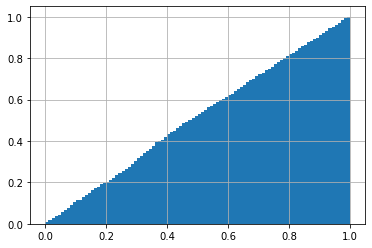

In [125]:
# plot the CDF
d.hist(cumulative=True, density=1, bins=100)

The distribution does appear to be uniform, demonstrated by the straight line CDF.

## Exercise 5.1
In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [126]:
# import package
import scipy.stats

In [135]:
# create a normal distribution for male height
dist = scipy.stats.norm(loc=178, scale=7.7)

# calculate the proportion that fall within the specified range
low = dist.cdf(177.8)
high = dist.cdf(185.4)
diff = high-low
print("% of US male population in range: {0:.0%}".format(diff))

% of US male population in range: 34%


## Bayesian (Elvis Presley twin)
Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way. It helps incorporate conditional probabilities into our conclusions.

Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.

We can solve this by making our hypothesis, H = Elvis is an identical twin, and then using Bayes' Theorem to calculate p(H). Here are the values that need to be plugged into the equation:

**P(H)** = (1/300) * (1/2) *(the baseline frequency that a birth results in identical twins AND the twins are male)*

**P(D|H)** = 1 *(the probability that the twin would be male IF the pair was indeed identical is 100%)*

**P(D)** = (1/300 * 1/2) + (1/4 * 1/125) *(this is the likelihood of having a male twins in ANY case. So the probability of a identical male twins plus the probability of fraternal male twins)*

When you plug these into Bayes' Theorem and solve, you end up with p(H|D) = 5/11, or .45.

## Bayesian & Frequentist Comparison
How do frequentist and Bayesian statistics compare?

Some key differences between the two approaches:

- Bayesian statistics requires the use of a **prior**, which is often subjective, whereas frequentist statistics looks only at the data from the current experiment.
- The result of a Bayesian approach to hypothesis testing is a probability distribution, rather than a p-value. The former is more intuitive and therefore may be easier to communicate.
- Frequentist methods are less computationally intensive than Bayesian methods, which may be one reason for their initial popularity. With modern computing power, it's now possible to employ Bayesian methods more broadly.
